<a href="https://colab.research.google.com/github/RahulParajuli/DataVisualizationandML/blob/main/Automation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 5000)

enter the path of the file you want to open: /content/Titanic-Dataset.csv
--------------------------------------------------
you entered a CSV or TSV file...
--------------------------------------------------
the shape of your data is :  (891, 12)
--------------------------------------------------
do you want to check datatypes? y/n: y
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    int64  
 10  Cabin        204 non-null    object 
 11  Embark

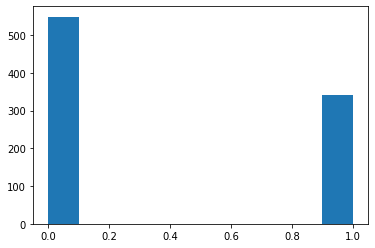

select graph to plot:

a. histogram 
 b. heatmap 
 c. scatterplot
select operation: a
--------------------------------------------------
PassengerId :  891 labels
Survived :  2 labels
Pclass :  3 labels
Name :  891 labels
Sex :  2 labels
Age :  89 labels
SibSp :  7 labels
Parch :  7 labels
Ticket :  681 labels
Fare :  91 labels
Cabin :  147 labels
Embarked :  3 labels
--------------------------------------------------

 select a column for histogram? 4
you have selected:  Sex for histogram
do you want to view histogram? y/n y


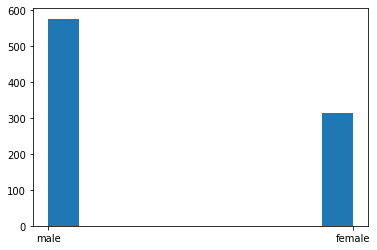

select graph to plot:

a. histogram 
 b. heatmap 
 c. scatterplot
select operation: a
--------------------------------------------------
PassengerId :  891 labels
Survived :  2 labels
Pclass :  3 labels
Name :  891 labels
Sex :  2 labels
Age :  89 labels
SibSp :  7 labels
Parch :  7 labels
Ticket :  681 labels
Fare :  91 labels
Cabin :  147 labels
Embarked :  3 labels
--------------------------------------------------

 select a column for histogram? 7
you have selected:  Parch for histogram
do you want to view histogram? y/n y


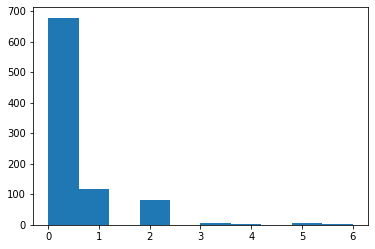

select graph to plot:

a. histogram 
 b. heatmap 
 c. scatterplot
select operation: a
--------------------------------------------------
PassengerId :  891 labels
Survived :  2 labels
Pclass :  3 labels
Name :  891 labels
Sex :  2 labels
Age :  89 labels
SibSp :  7 labels
Parch :  7 labels
Ticket :  681 labels
Fare :  91 labels
Cabin :  147 labels
Embarked :  3 labels
--------------------------------------------------

 select a column for histogram? 11
you have selected:  Embarked for histogram
do you want to view histogram? y/n y


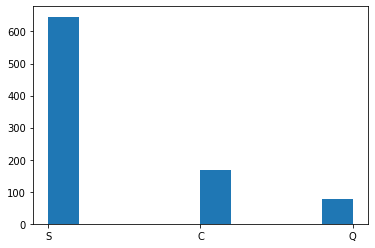

select graph to plot:

a. histogram 
 b. heatmap 
 c. scatterplot
select operation: n
--------------------------------------------------
have a good day!!!


In [80]:
# Function to read all kinds of files
def read_any():
    file = input("enter the path of the file you want to open: ")
    '''
    function parameter  : file_path
    parameter datatype  : str
    function returns    : pandas dataframe
    return datatype     : pandas.core.frame.DataFrame
    function definition : takes file_path as input and read it using pandas on the basis of its extension.
                          'sep' is set to None as files can have , or ; or any other separater.
                          also 'python' engine is used inplace of default 'c' engine for 'sep = None' to work properly.
    '''
    print("-" * 50)
    if file.endswith(('.csv', '.tsv')):
        df = pd.read_csv(file, engine='python', sep = None)
        print("you entered a CSV or TSV file...")
    elif file.endswith('.json'):
        df = pd.read_json(file)
        print("you entered a json file...")
    elif file.endswith('.xml'):
        df = pd.read_xml(file)
        print("you entered a XML file...")
    elif file.endswith(('.xls','.xlsx')):
        df = pd.read_excel(file, engine='python', sep = None)
        print ("you entered a XLS or XLSX file...")
    elif file.endswith('.hdf'):
        df = pd.read_hdf(file)           
        print("you entered a hdf file...")
    elif file.endswith('.sql'):
        df = pd.read_sql(file)
        print("you entered a sql file...")
    else:
        raise ValueError(f'Unsupported filetype: {file}')
    print("-"*50)
    print("the shape of your data is : ",df.shape)
    #remove redundant data like single data in every row
    print("-"*50)
    n = input("do you want to check datatypes? y/n: ")
    if n == "y":
      df = df.dropna(axis=1,how='all') # Removes null columns from tables
      df = df.dropna(axis=0,how='all') # Removes rows having all null values
      df.reset_index(drop=True)
      df.drop(columns=df.columns[df.nunique()==1], inplace=True)
    
    #converting object datatype to integer
    for j in df.columns.values.tolist(): # Iterate on columns of dataframe
      try:
          df[j] = df[j].astype('int') # Convert datatype from object to int, of columns having all integer values 
      except:
          pass
    df.info()
    print("-" * 50)
    n = input("check number of labels for each columns?: y/n")
    if n == 'y':
      for col in df.columns[0:]:
        print(col,": ", len(df[col].unique()), "labels")
    return df

df = read_any()

def operations(df):
  print("-" * 50)
  print("Select operation: \n 1. Time series \n 2. Classification \n 3. Regression")
  print("-" * 50)
  category = input("\n Select operation to carry: ")

  # asking user which one is the output column
  for i in range(1, len(df.columns)):
      print(str(i)+". "+str(df.columns[i]))
  print("-" * 50)
  output = input("\n Which one is your output column? ")
  output_column = df.columns[int(output)]
  print("you have selected output feature: ", output_column, "for operation", category)

  #asking user for how they want to replace missing value
  print("-" * 50)
  print("Now we remove missing values in numeric column")
  print("-" * 50)
  temp = {"1" : "linreg", "2" : "knn", "3" : "mean", "4" : "median", "5" : "most_frequent", "6" : "delete", "7" : "False"}
  print("-" * 50)
  
  #KNN imputer
  from sklearn.impute import KNNImputer
  import numpy as np

  imputer=KNNImputer(n_neighbors=5)
  '''
  function for knn imputation in missing values in the data
  df - dataset provided by the users
  '''
  # finding numeric columns
  cols_num = df.select_dtypes(include=np.number).columns
  
  for feature in df.columns:
      # for numerical columns
      if feature in cols_num:
          df[feature] = pd.DataFrame(imputer.fit_transform(np.array(df[feature]).reshape(-1, 1)))
      # for categorical columns impute with mode
      else:
          df[feature] = df[feature].fillna(df[feature].mode().iloc[0])

  print(" Methods to fill null values \n 1. Linear Regression \n 2. KNN \n 3. Mean \n 4. Median \n 5. Mode \n 6. Delete \n 7. Do Nothing")
  missing = input(" \n How do you want to fill null values in your numeric columns?: ")
  missing_num = temp[f'{missing}']
  print("-" * 50)
  print("*******now we remove null value in categorical data********")
  temp = {"1" : "logreg", "2" : "knn", "3" : "most_frequent", "4" : "delete", "5" : "False"}
  print(" Methods to fill null values \n 1. Logistic Regression \n 2. KNN \n 3. Mode \n 4. Delete \n 5. Do Nothing")
  missing = input(" \n How do you want to fill null values in your categorical columns? \n Enter corresponding number: ")
  missing_categ = temp[f'{missing}']
  print(missing_categ)

# encoding values
  print("-" * 50)
  temp = {"1" : ['onehot'], "2" : ['label'], "3" : "False"}
  print("-" * 50)
  print(" Encoding types \n 1. Onehot \n 2. Label \n 3. Do Nothing")
  encode = input(" \n How do you want to encode your columns? \n Enter corresponding number: ")
  encode_categ = temp[f'{encode}']
  print("selected operation: ", encode_categ)
  print("-" * 50)
  print("-" * 50)
  print("-" * 50)
  print("final result")
  print(df.head())
  print("-" * 50)
  print(df.isna().sum)
  print("Dataframe description: ")
  print(df.describe())
  print("-" * 50)
  print("-" * 50)


  #converting date time format to dt
  print("*****converting date time file format*****")
  for col in df.columns[0:]:
    print(col)
  convertdate = df.apply(lambda col: pd.to_datetime(col, errors='ignore') if col.dtypes == object else col, axis=0)


  #detecting price column in dataframe
  print("*"*50)
  print("detecting price column in dataframe")
  numeric_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
  price_cols = [col for col in numeric_cols if col.lower().find('price') != -1 or col.lower().find('cost') != -1 or 
                  col.lower().find('total') != -1 or col.lower().find('amount') != -1 or col.lower().find('revenue') != -1 or
                  col.lower().find('profit') != -1 or col.lower().find('margin') != -1 or col.lower().find('sales') != -1]
  if len(price_cols) > 1:
      for i in range(len(price_cols)):
          df.rename(columns={price_cols[i]: 'price_'+str(i+1)}, inplace=True)
  elif len(price_cols) == 1:
      df.rename(columns={price_cols[0]: 'price'}, inplace=True)
  return df
# df.head(2)

def visualization(df):
  while True:
    print("select graph to plot:\n")
    print("a. histogram \n b. heatmap \n c. scatterplot")
    n = input("select operation: ")
    print("-"*50)
    if n == "a":
      for col in df.columns[0:]:
          print(col,": ", len(df[col].unique()), "labels")
      print("-"*50)
      column = input("\n select a column for histogram? ")
      selected_column = df.columns[int(column)]
      print("you have selected: ", selected_column, "for histogram")
      n = input("do you want to view histogram? y/n ")
      if n=='y':
        plt.hist(df[selected_column])
        plt.show()
        continue
      else:
        print("operation has finished")
    elif n == "b":
      import seaborn as sns
      for col in df.columns[0:]:
          print(col,": ", len(df[col].unique()), "labels")
      l = input("do you want to view heatmap? y/n ")
      if l == "y":
        data = np.random.randint(low=1,
                            high=100,
                            size=(10, 10))
        annot = True
        a = sns.heatmap(df, annot=annot)
        plt.show()
        continue
      else:
        print("operation is cancelled")
    else:
      print("have a good day!!!")
    return "done"

df2 = operations(df)
visual = visualization(df2)
